# **Data Analysis and Study Design**

### Author
- Patrick Payne, MPH
- Share the research office with Alex
- Background in computational astrophysics and public health
- Role of supporting research, QI, and all other scholarly work in the department

### Learning Objectives
- Explain numerical intuition and its value in studies
- Build an understanding of common statistics and their interpretations
- Differentiate experimental study designs
- Differentiate observational study designs
- Introduce Data Science, Machine Learning, and Artificial Intelligence in Anesthesia

---
---

## Numerical Intuition
- the ability to see data, describe the data, and provide a meaningful interpretation -> telling a story
- supports making a decision from the data instead of having the data make your decision
- built through experience, trial/error, and critical analysis of data in multiple settings

![SedLine brain function monitor display from Masimo](https://th.bing.com/th/id/R.a4338dcc7cd3bd57c2f605f498bf993d?rik=wtaeX9iYdEWCqg&riu=http%3a%2f%2fwww.masimo.co.uk%2fsiteassets%2fus%2fimages%2fproducts%2fcontinuous-monitors%2froot-platform%2fnext-generation-sedline%2froot_sed_digital_1-up_us_6.29.17_web.jpg&ehk=hMn359jM%2befjAqgwU3ZiQYUiUYttA%2bQ5P3004yt7q40%3d&risl=&pid=ImgRaw&r=0)
- EEG Waveforms
- Patient State Index
- EMG
- Suppression Ratio
- Spectral Edge Frequencies
- Density Spectral Array: power spectrum, frequency range, etc.

## Hazards of numerical intuition
- When we don't spend enough time with the problems our iniuition faulters
- This is commonly seen in confidence intervals
    - We often interpret overlapping confidence interval and non-overlapping intervals as a reflection of a result's p-value
    - We intuit that overlapping confidence intervals are not significant
![Overlapping 95% confidence intervals for two measurements](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2019/03/CI_groups_95.png?w=576&ssl=1)

    - However, this is not a rule and our intuition has lead us astray
    - We have based our intuition on the wrong observation
![95% confidence interval of the difference between two measurements](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2019/03/CI_difc_means_95.png?w=576&ssl=1)

     - When the 95% confidence interval for the **difference** between the observations does not include zero, we have a proxy for the p-value

## Using Statistics - Sensitivity and Specificity

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-ab26{background-color:#FFF;border-color:inherit;color:#212121;font-size:xx-large;font-weight:bold;text-align:center;
  vertical-align:middle}
.tg .tg-aui5{background-color:#FFF;border-color:inherit;color:#212121;font-size:x-large;text-align:left;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-ab26" colspan="2"><span style="font-weight:bold">Confusion Matrix</span></th>
    <th class="tg-ab26" colspan="2"><span style="font-weight:bold">Predicted Condition</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-aui5" rowspan="3">Actual Condition</td>
    <td class="tg-aui5"></td>
    <td class="tg-aui5">Predicted Positive</td>
    <td class="tg-aui5">Predicted Negative</td>
  </tr>
  <tr>
    <td class="tg-aui5">Actual Positive</td>
    <td class="tg-aui5">True Positive (TP)</td>
    <td class="tg-aui5">False Negative (FN)</td>
  </tr>
  <tr>
    <td class="tg-aui5">Actual Negative</td>
    <td class="tg-aui5">False Positive (FP)</td>
    <td class="tg-aui5">True Negative (TN)</td>
  </tr>
</tbody>
</table>

### How good is this test?

Can the test predict an actual positive case?
- How many of the actual cases are testing positive?
    - Look at the number of times the patient had (a positive test and the condition) considering that they (actually had the condition)

$\huge \frac{\text{Actual Positive and Predicted Positive}}{\text{Actual Positive}} = \frac{TP}{TP + \color{blue}{FN}} $ <br><br>
- How many of the positive tests are actual cases?
    - Look at the number of times the patient had (a positive test and the condition) considering that they (tested positive)

$\Large \frac{\text{Actual Positive and Predicted Positive}}{\text{Predicted Positive}} = \frac{TP}{TP + \color{blue}{FP}} $
---    
    
Can the test predict an actual negative case?
- How many of the patients without the condition are testing negative?
    - Look at the number of times the patient had (a negative test and did **not** have the condition) considering that they (did **not** have the condition)

$\huge \frac{\text{Actual Negative and Predicted Negative}}{\text{Actual Negative}} = \frac{TN}{TN + \color{red}{FP}} $  <br><br>
- How many of the negative test are patients without the condition?
    - Look at the number of times the patient had (a negative test and did **not** have the condition) considering that they (tested negative)

$\huge \frac{\text{Actual Negative and Predicted Negative}}{\text{Predicted Negative}} = \frac{TN}{TN + \color{red}{FN}} $

### Lets name these statistics

<details>
  <summary markdown="span">How many of the actual cases are testing positive?</summary>

  &emsp; **Sensitivity**
</details>
<details>
  <summary markdown="span">How many of the positive tests are actual case?</summary>

  &emsp; **Positive predicitive value**
</details>
<details>
  <summary markdown="span">How many of the patients without the condition are testing negative?</summary>

  &emsp; **Specificity**
</details>
<details>
  <summary markdown="span">How many of the negative tests are patients without the condition?</summary>

  &emsp; **Negative predictive value**
</details>

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive

In [70]:
def plot_cases(Specificity=0.8, Sensitivity=0.8,seed=True):
    N = 100

    if seed: np.random.seed(42)
    result_specificity = np.random.choice(['red','black'],int(N/2), p = [1.0 - Specificity, Specificity])
    result_sensitivity = np.random.choice(['blue','black'],int(N/2), p = [1.0 - Sensitivity, Sensitivity])

    random_specificity_x = np.random.uniform(5.1,10, int(N/2))
    random_specificity_y = np.random.uniform(0,10, int(N/2))
    random_sensitivity_x = np.random.uniform(0,4.9, int(N/2))
    random_sensitivity_y = np.random.uniform(0,10, int(N/2))

    fig= plt.figure(figsize=(8,8))

    plt.scatter(random_sensitivity_x,random_sensitivity_y, c = result_sensitivity)
    plt.scatter(random_specificity_x,random_specificity_y, c = result_specificity)
    x1, y1 = [5, 5], [0, 10]
    plt.plot(x1,y1, c='grey')

    results = []
    result_counts={}
    TP_count = 0
    FP_count = 0
    TN_count = 0
    FN_count = 0
    for elem in result_specificity:
        if elem == 'red':
            results.append("FN")
            FN_count += 1
        else:
            results.append("TN")
            TN_count += 1
    for elem in result_sensitivity:
        if elem == 'blue':
            results.append("FP")
            FP_count += 1
        else:
            results.append("TP")
            TP_count += 1
    result_counts['TP'] = TP_count
    result_counts['FP'] = FP_count
    result_counts['TN'] = TN_count
    result_counts['FN'] = FN_count

    sensitivity_sim = TP_count/ (TP_count + FN_count)
    PPV = TP_count / (TP_count + FP_count)
    specificity_sim = TN_count / (TN_count + FP_count)
    NPV = TN_count / (TN_count + FN_count)
    print(f"Measured Sensitivity: {sensitivity_sim:.2f}")
    print(f"Positive predictive value: {PPV}")
    print(f"Measured Specificity: {specificity_sim:.2f}")
    print(f"Negative predictive value: {NPV}")

    plt.show()
    print(result_counts)
    return result_counts

def plot_bayes(results):
    pretest_probability = np.linspace(0,1.0, num=100)
    false_positive_rate = results['FP']/ (results['FP'] + results['TP'])
    #print(false_positive_rate)

Measured Sensitivity: 0.77
Positive predictive value: 0.98
Measured Specificity: 0.97
Negative predictive value: 0.7


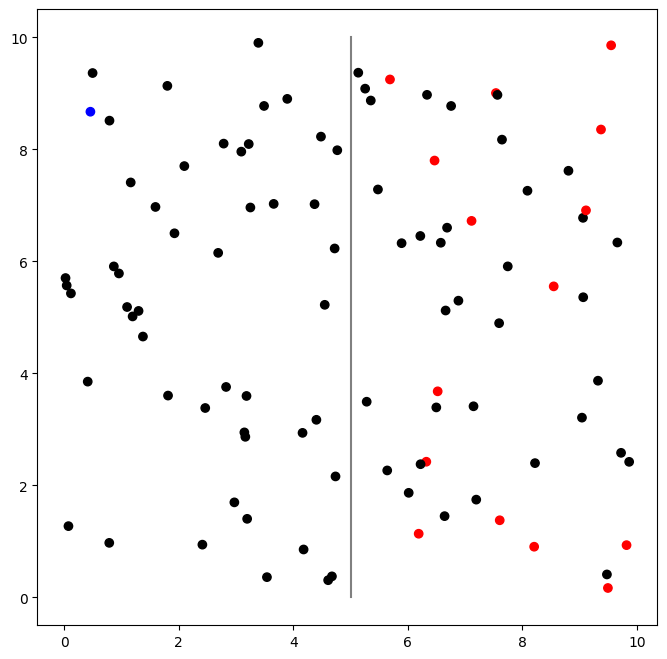

{'TP': 49, 'FP': 1, 'TN': 35, 'FN': 15}


In [71]:
print("Impact of Sensitivity and Specificity")
print("Colored dots represent a false result, left are positive results and the right are negative results")
figure = interactive(plot_cases, Specificity=(0.0,0.99, 0.01), Sensitivity=(0.0,0.99, 0.01), seed=[True,False])
display(figure)
plot_bayes(figure.result)

## How are these values used?
- Often quoted to represent the 'goodness' of a test
- Can be utilized with Bayes Rule to evaluate the probability of disease for a patient

![Application of Bayes Rule](https://ebm.bmj.com/content/ebmed/16/6/163/F1.medium.gif)

Medow MA, Lucey CRA qualitative approach to Bayes' theorem BMJ Evidence-Based Medicine 2011;16:163-167.


## Bayes Rule?
- Way of using conditional probabilities to characterize the probability of a hypothesis using observations

$\huge P(\text{Hypothesis} | \text{Data}) = \frac{P(\text{Hypothesis}) \cdot P(\text{Data} | \text{Hypothesis})}{P(\text{Data})}$
- Applying this to medical testing:

$\begin{align}
\huge P(\text{True Positive} | \text{Predicted Positive})& = \frac{P(\text{True Positive}) \cdot P(\text{Predicted Positive} | \text{True Positive})}{P(\text{Predicted Positive})}
\end{align}$
<details>
  <summary markdown="span">Example: Provided that the prevalence of a disease is one in one thousand, the positive predictive value 0.95, and the sensitivity is 1.0. What is the probability of a random patient who received a positive test result has the disease?</summary>

$ \begin{align}
  P(\text{True Positive}) &= 1/1000 \\
  P(\text{Predicted Positive}) &=  \text{Probability of a True Positive + Probability of a False Positive} \\
  & = (\text{Prevalence} \cdot \text{Sensitivity}) + ((1 - \text{Prevalence}) \cdot (1 - \text{positive predictive value})) \\
  P(\text{Predicted Positive | Disease}) &= \text{Sensitivity} \\
  P(\text{True Positive} | \text{Predicted Positive}) &= \frac{(0.001) \cdot (1.0)}{(0.001 \cdot 1.0) + (0.999 \cdot 0.05)} = 0.02
  \end{align}
$
</details>




## Do you really trust that P-value?
- We all know the standard p-value, level of significance, is 0.05
- This means that there is a 5% chance of a Type I error
    - An error that we incorrectly reject the null hypothesis
    - So in five percent of cases where no association exists, we would find a signficant association
![Hazard of p-values shown in an XKCD comic where an association is found after running numerous statistical tests on the same sample](https://imgs.xkcd.com/comics/significant.png)

- What does this look like in practice?

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-4c4e{border-color:inherit;color:#3531ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky">Open-lung (n = 246)</th>
    <th class="tg-0pky">Conventional (n = 247)</th>
    <th class="tg-0pky">Absolute difference % (95%CI)</th>
    <th class="tg-0pky">p value</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Tidal volume, median (IQR), ml of PBW</td>
    <td class="tg-0pky">6.9 (6.3–7.3)</td>
    <td class="tg-0pky">7.0 (6.7–7.8)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">0.005</td>
  </tr>
  <tr>
    <td class="tg-0pky">PEEP, median (IQR), cm H2O</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Lowest level</td>
    <td class="tg-0pky">5 (2–8)</td>
    <td class="tg-0pky">2 (2–2)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">&lt; 0.001</td>
  </tr>
  <tr>
    <td class="tg-0pky">Highest level</td>
    <td class="tg-0pky">8 (8–8)</td>
    <td class="tg-0pky">2 (2–2)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">&lt; 0.001</td>
  </tr>
  <tr>
    <td class="tg-0pky">Mode level</td>
    <td class="tg-0pky">8 (5–8)</td>
    <td class="tg-0pky">2 (2–2)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">&lt; 0.001</td>
  </tr>
  <tr>
    <td class="tg-0pky">Recruitment maneuver</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">&lt; 0.001</td>
  </tr>
  <tr>
    <td class="tg-0pky">At least 1</td>
    <td class="tg-0pky">236/243 (97.1)</td>
    <td class="tg-0pky">19/245 (7.7)</td>
    <td class="tg-0pky">89.4 [80.6 to 98.2]</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">At least 2</td>
    <td class="tg-0pky">232/243 (95.4)</td>
    <td class="tg-0pky">1/245 (0.4)</td>
    <td class="tg-0pky">95.0 [86.2 to 100]</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">At least 3</td>
    <td class="tg-0pky">218/243 (89.7)</td>
    <td class="tg-0pky">1/245 (0.4)</td>
    <td class="tg-0pky">89.3 [80.5 to 98.1]</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">At least 4</td>
    <td class="tg-0pky">186/243 (76.5)</td>
    <td class="tg-0pky">1/245 (0.4)</td>
    <td class="tg-0pky">76.1 [67.5 to 84.7]</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">More than 4</td>
    <td class="tg-0pky">166/243 (68.3)</td>
    <td class="tg-0pky">1/245 (0.4)</td>
    <td class="tg-0pky">67.9 [59.5 to 76.3]</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Intervention adjustment for arterial hypotension</td>
    <td class="tg-0pky">43/243 (17.7)</td>
    <td class="tg-0pky">0/245 (0)</td>
    <td class="tg-0pky">17.7 [12.7 to 22.7]</td>
    <td class="tg-0pky">&lt; 0.001</td>
  </tr>
  <tr>
    <td class="tg-0pky">Intervention adjustment for surgical requirements</td>
    <td class="tg-0pky">153/243 (63.0)</td>
    <td class="tg-0pky">10/245 (4.1)</td>
    <td class="tg-0pky">58.9 [50.6 to 67.2]</td>
    <td class="tg-0pky">&lt; 0.001</td>
  </tr>
  <tr>
    <td class="tg-0pky">Rescue for hypoxemia</td>
    <td class="tg-0pky">4/243 (1.6)</td>
    <td class="tg-0pky">35/245 (14.3)</td>
    <td class="tg-0pky">− 12.7 [− 17.5 to − 7.9]</td>
    <td class="tg-0pky">&lt; 0.001</td>
  </tr>
  <tr>
    <td class="tg-4c4e">CPB duration, median (IQR), min</td>
    <td class="tg-4c4e">90 (74–119)</td>
    <td class="tg-4c4e">84 (67–108)</td>
    <td class="tg-4c4e">–</td>
    <td class="tg-4c4e">0.05</td>
  </tr>
  <tr>
    <td class="tg-0pky">Aortic cross clamp duration, median (IQR), min</td>
    <td class="tg-0pky">68 (52–91)</td>
    <td class="tg-0pky">64 (48–83)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">0.12</td>
  </tr>
  <tr>
    <td class="tg-0pky">Mammary artery harvesting</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">0.15</td>
  </tr>
  <tr>
    <td class="tg-0pky">None</td>
    <td class="tg-0pky">144/243 (59.3)</td>
    <td class="tg-0pky">166/245 (67.8)</td>
    <td class="tg-0pky">− 8.5 [− 17.0 to 0]</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Unilateral</td>
    <td class="tg-0pky">40/243 (16.5)</td>
    <td class="tg-0pky">33/245 (13.5)</td>
    <td class="tg-0pky">3.0 [− 3.3 to 9.3]</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Bilateral</td>
    <td class="tg-0pky">59/243 (24.3)</td>
    <td class="tg-0pky">46/245 (18.8)</td>
    <td class="tg-0pky">5.5 [− 1.8 to 12.8]</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Volume of fluids administered, median (IQR), ml</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Crystalloid</td>
    <td class="tg-0pky">2000 (1500–2500)</td>
    <td class="tg-0pky">1900 (1500–2500)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">0.19</td>
  </tr>
  <tr>
    <td class="tg-0pky">Colloid</td>
    <td class="tg-0pky">500 (0–900)</td>
    <td class="tg-0pky">500 (0–750)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">0.38</td>
  </tr>
  <tr>
    <td class="tg-0pky">Blood products transfusion</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Packed-red blood cells</td>
    <td class="tg-0pky">21/243 (8.6)</td>
    <td class="tg-0pky">17/245 (6.9)</td>
    <td class="tg-0pky">1.7 [− 3.0 to 6.4]</td>
    <td class="tg-0pky">0.48</td>
  </tr>
  <tr>
    <td class="tg-4c4e">Platelets</td>
    <td class="tg-4c4e">25/243 (10.3)</td>
    <td class="tg-4c4e">13/245 (5.3)</td>
    <td class="tg-4c4e">5.0 [0.3 to 9.7]</td>
    <td class="tg-4c4e">0.04</td>
  </tr>
  <tr>
    <td class="tg-0pky">Fresh-frozen plasma</td>
    <td class="tg-0pky">8/243 (3.3)</td>
    <td class="tg-0pky">3/245 (1.2)</td>
    <td class="tg-0pky">2.1 [− 0.5 to 4.7]</td>
    <td class="tg-0pky">0.12</td>
  </tr>
  <tr>
    <td class="tg-0pky">Cardioplegia, median (IQR), ml</td>
    <td class="tg-0pky">81 (32–139)</td>
    <td class="tg-0pky">92 (35–646)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">0.15</td>
  </tr>
  <tr>
    <td class="tg-0pky">Need for vasopressors</td>
    <td class="tg-0pky">99/243 (40.7)</td>
    <td class="tg-0pky">89/245 (36.3)</td>
    <td class="tg-0pky">4.4 [− 4.2 to 13.0]</td>
    <td class="tg-0pky">0.31</td>
  </tr>
  <tr>
    <td class="tg-0pky">Need for inotropese</td>
    <td class="tg-0pky">27/243 (11.1)</td>
    <td class="tg-0pky">29/245 (11.8)</td>
    <td class="tg-0pky">− 0.7 [− 6.3 to 4.9]</td>
    <td class="tg-0pky">0.80</td>
  </tr>
  <tr>
    <td class="tg-0pky">Calculated respiratory compliance, median (IQR), ml per cm H2O</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Dynamic</td>
    <td class="tg-0pky">36.0 (29.5 to 45.5)</td>
    <td class="tg-0pky">31.0 (25.0 to 38.0)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">&lt; 0.001</td>
  </tr>
  <tr>
    <td class="tg-0pky">Static</td>
    <td class="tg-0pky">50.0 (41.5 to 62.5)</td>
    <td class="tg-0pky">40.0 (33.0 to 50.0)</td>
    <td class="tg-0pky">–</td>
    <td class="tg-0pky">&lt; 0.001</td>
  </tr>
</tbody>
</table>


## What do we do about p-values?
- Bonferroni Corrections
    - Simplest approach to reduce the likelihood of Type I errors
    - Dividing the level of significance by the number of comparisons performed
    - Easy to do even if it isn't carried out by the investigators
- Hierarchical Design and Statistical Gatekeeping
    - Placing the standard level of significance on the primary outcome
    - Reducing the level of significance for secondary outcomes that are evaluated in order of priority to the study
    - [We used a four-step hierarchical-testing strategy for the pooled empagliflozin group versus the placebo group in the following order: noninferiority for the primary outcome, noninferiority for the key secondary outcome, superiority for the primary outcome, and superiority for the key secondary outcome.](https://www.nejm.org/doi/full/10.1056/NEJMoa1504720)
        1. Investigate noninferiority of primary outcome
        2. If it is significant, investigate noninferiority of secondary outcome
        3. If it is significant, investigate superioirity of primary outcome
        4. If it is significant, investigate superioirity of secondary outcome

## Experimental Design
- Quasi-experimental design
    - differs a true experiment in that it **lacks randomization**
    - individuals have different treatments and are followed through time, but were not assigned into their treatments
        - being in a particular treatment group occurs through convenience, self-selection, etc.
![differentiation of types of experimental design](https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs12874-021-01224-x/MediaObjects/12874_2021_1224_Fig1_HTML.png)

[de Vocht, F., Katikireddi, S.V., McQuire, C. et al. Conceptualising natural and quasi experiments in public health. BMC Med Res Methodol 21, 32 (2021). https://doi.org/10.1186/s12874-021-01224-x](https://pubmed.ncbi.nlm.nih.gov/33573595/)


- Randomized controlled trial forms the basic experimental unit of medicine
    - An experimental design that utilizes randomization to address potential confounders that would otherwise be difficult to adjust or observe
    - Findings are quoted as the gold standard for medical research
    - However, even RCTs can be of varying quality depending on funding source, blinding, study populations, etc.
        - These variations can impact the internal and external validity of the results
        - Often multi-center clinical trials aim to produce the highest quality by observing a highly varied population and utilizing advanced statistical techniques, e.g. mixed methods
- Important to recognize that RCT is a broad class of experimental studies
    - many RCTs involve a study design called A/B testing
        - a single independent variable is used to investigate one or several outcome variables
        - this approach can even involve multiple study arms, e.g. A/B/C testing
    - however, other techniques exist but rely on more complex statistical techniques
        - multi-armed bandit experiments
        - response surface methods
        - bayesian optimization

### Dose-Response in multiple dimensions
- The dose-response curve gives us a basic understanding of how much medication is needed to produce a particular therapeutic outcome
- Often a single medication or variable is not an accurate model for treatments
    - often a single therapeutic outcome fails to capture the desired outcome

![dose-response curve for a single effect and a single medication](https://toxedfoundation.org/wp-content/uploads/2020/04/effect-vs-dose.jpg)

- Response Surfaces aim to create a multi-dimensional dose-response curve
![various response surfaces in color](https://www.researchgate.net/profile/Dandan-Liu-5/publication/304568041/figure/fig1/AS:387905622167552@1469495316025/Three-dimensional-3D-response-surface-plots-showing-the-effect-of-the-variables-on-the.png)

    - We can also project the third dimension (outcome) into a color, or choose to represent it as a third dimension in space
    - The outcome does not need to be a single variable, it can be a function
$\text{outcome} = \beta_1 \text{pain score} + \beta_2 \text{nausea and vomiting score} + \beta_3 \text{length of stay}$

    

### So why use anything but the 'strongest' experimental designs?
- Familiarity with classic techniques
- More information needed to design experiments for response surface and bayesian optimization studies

# Observational Techniques
- These are studies where the research does **not** directly influence the independent variables
- Case-studies are the basic unit of an observational study
   - investigating the outcomes for a particular patient
   - post-hoc in nature, the outcome is known and associations are obtained to characterize the patient before the outcome
   - with a single or small number of case-studies, statistical techniques cannot be used
   - a large case-series may begin to use statistical analyses, but these will be post-hoc analyses and should be approached with caution
- Cross-sectional studies make an observation at a single moment in time
   - often involved in the measure of disease prevalence
   - Longitudinal studies arise from cross-sectional studies
       -  when they are repeated to investigate changes of prevalence over time
- Case-control studies are where we begin to utilize statistics to better understand relationships
    - often utilized for studies investigating low prevalence conditions
    - well-designed studies often utilize methods like propensity scores to ensure that the cases and controls are accounting for known confounders

## Machine Learning in Anesthesia

- Edwards Lifesciences Hypertension Prediction Index
    - [Kouz K, Monge García MI, Cerutti E, et al. Intraoperative hypotension when using hypotension prediction index software during major noncardiac surgery: a European multicentre prospective observational registry (EU HYPROTECT). BJA Open. 2023;6:100140. Published 2023 May 4. doi:10.1016/j.bjao.2023.100140](https://pubmed.ncbi.nlm.nih.gov/37588176/)

![Edwards Lifesciences Hypertension Prediction Index monitor screen](https://assets-us-01.kc-usercontent.com/6239a81e-8f0f-0040-a1df-b4932a10f6ae/048c09ab-50a1-46cf-82ad-4d561c74b5d5/hpi-slide-3%402x.png?w=1920&q=100&auto=format)


- Difficult airway prediction
    - [Wang G, Li C, Tang F, Wang Y, Wu S, Zhi H, Zhang F, Wang M, Zhang J. A fully-automatic semi-supervised deep learning model for difficult airway assessment. Heliyon. 2023 Apr 22;9(5):e15629. doi: 10.1016/j.heliyon.2023.e15629. PMID: 37159696; PMCID: PMC10163620.](https://pubmed.ncbi.nlm.nih.gov/37159696/)
![Difficult airway classification interface to build research dataset](https://ars.els-cdn.com/content/image/1-s2.0-S2405844023028360-gr8.jpg)
- Anatomy Identification
    - [Gungor I, Gunaydin B, Oktar SO, et al. A real-time anatomy ıdentification via tool based on artificial ıntelligence for ultrasound-guided peripheral nerve block procedures: an accuracy study. J Anesth. 2021;35(4):591-594. doi:10.1007/s00540-021-02947-3](https://pubmed.ncbi.nlm.nih.gov/34008072/)
![Anatomy identification results in ultrasound-guided peripheral nerve block artificial intelligence study](https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs00540-021-02947-3/MediaObjects/540_2021_2947_Fig1_HTML.jpg?as=webp)

# Caveat Emptor - Let the buyer beware
- Intepreting a machine learning publication comes with a new set of biases and concerns
- Think about how the data sets were trained
    - Garbage in garbage out
    - Only healthy patients?
    - Only members of specific risk strata, demographics etc. ?
    - Data used to train the model?
- Similar concerns of generalizability as a typical study, but this could be hidden in a model once that tool comes to market
- If a your colleage received the same training as the machine, would you be confident in their ability?

# Contact Information
- Patrick Payne
    - patrick.payne [at] uvmhealth.org
    - **or, stop by the research office!**